Intro : *This analysis explores the historical trends and future predictions of solar photovoltaic (PV) module prices. Using a combination of historical data visualization and predictive modeling, we aim to understand pricing dynamics and forecast future cost trajectories.*

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

def clean_data(df):
    # Convert 'Year' to a datetime object if it's not already in datetime format
    if df['Year'].dtype == 'int64':  # Assuming 'Year' is initially an integer type
        df['Year'] = pd.to_datetime(df['Year'], format='%Y').copy()

    # Drop rows with any missing values
    df = df.dropna().copy()

    # Convert any numeric data from strings to float or int
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_numeric(df[col]).copy()
            except ValueError:
                pass  # or handle the exception if numeric conversion is expected

    return df.copy()

In [ ]:
def load_data(file_path):
    return pd.read_csv(file_path).copy()


# Assuming the functions load_data and clean_data are defined as before
solar_module_prices = load_data('https://raw.githubusercontent.com/giofile/Project_CO2_Emissions/main/QueryThree/Data_Sources/solar-pv-prices.csv')
solar_system_costs = load_data('https://raw.githubusercontent.com/giofile/Project_CO2_Emissions/main/QueryThree/Data_Sources/solar-pv-system-costs.csv')

solar_module_prices = clean_data(solar_module_prices)
solar_system_costs = clean_data(solar_system_costs)

In [ ]:
# Print the column names of the DataFrame
print(solar_module_prices.columns)


Index(['Entity', 'Code', 'Year', 'Solar photovoltaic module price'], dtype='object')


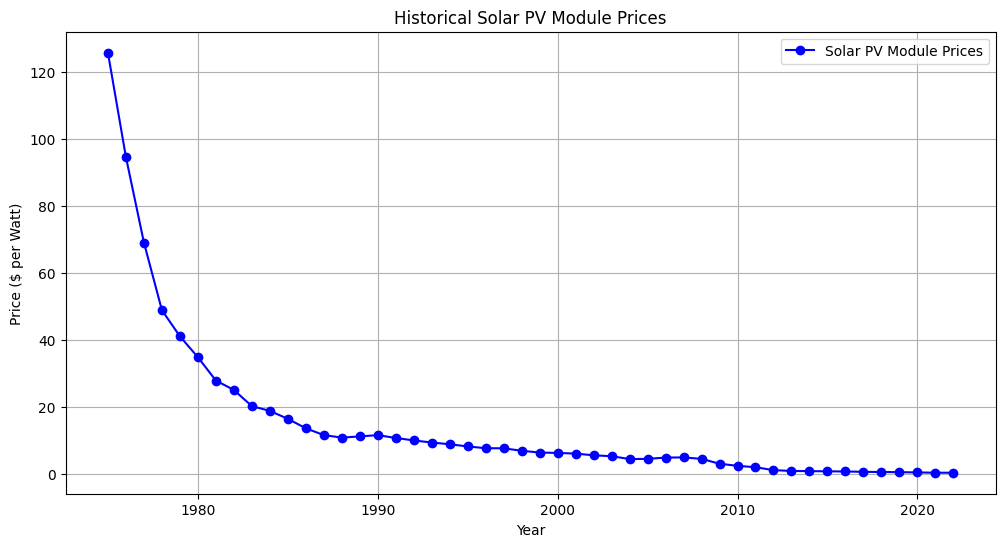

In [ ]:
import matplotlib.pyplot as plt

# Assuming solar_module_prices has been cleaned and the 'Year' column has been properly formatted
plt.figure(figsize=(12, 6))
plt.plot(solar_module_prices['Year'], solar_module_prices['Solar photovoltaic module price'], label='Solar PV Module Prices', marker='o', color='blue')
plt.title('Historical Solar PV Module Prices')
plt.xlabel('Year')
plt.ylabel('Price ($ per Watt)')
plt.legend()
plt.grid(True)
plt.show()



Graph 1. **Historical Solar PV Module Prices Graph:**
   - The historical graph reveals a steep decline in solar PV module prices over the past four decades, underlining the rapid advancements and increased affordability of solar technology.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


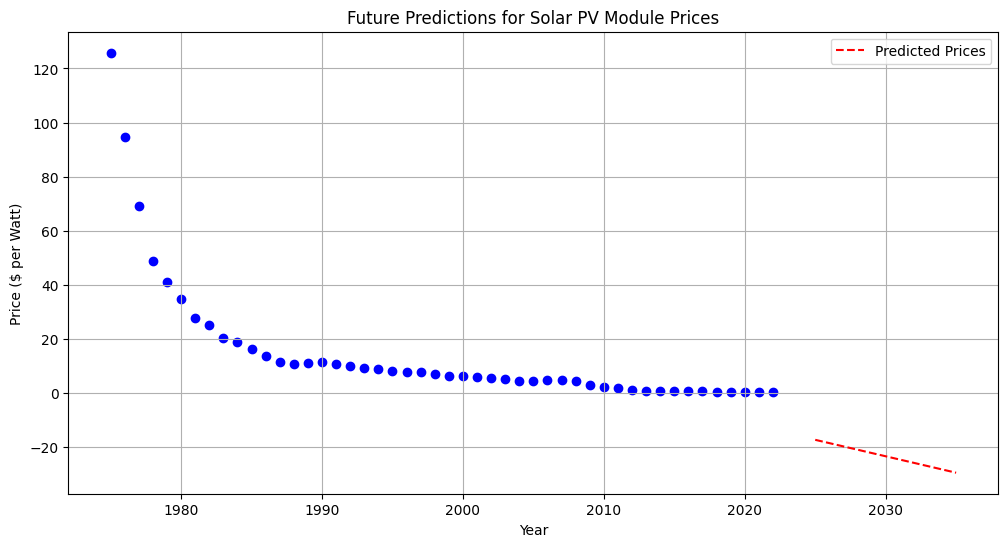

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Ensure 'Year' is converted from datetime to numerical year if not already done
if solar_module_prices['Year'].dtype != np.int64:
    solar_module_prices['Year'] = solar_module_prices['Year'].dt.year.copy()

X = solar_module_prices[['Year']].copy()
y = solar_module_prices['Solar photovoltaic module price'].copy()

model = LinearRegression()
model.fit(X, y)

# Predict for future years
future_years = np.array([[2025], [2030], [2035]])
future_years = np.array(future_years)
predicted_prices = model.predict(future_years).copy()

# Plotting the predictions
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue')
plt.plot(future_years, predicted_prices, 'r--', label='Predicted Prices')
plt.title('Future Predictions for Solar PV Module Prices')
plt.xlabel('Year')
plt.ylabel('Price ($ per Watt)')
plt.legend()
plt.grid(True)
plt.show()


graph 2. **Future Predictions for Solar PV Module Prices Graph:**
   - Predictive modeling indicates a continued decline in solar PV module prices, though at a slower rate, suggesting near-future cost stabilization as the technology matures.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


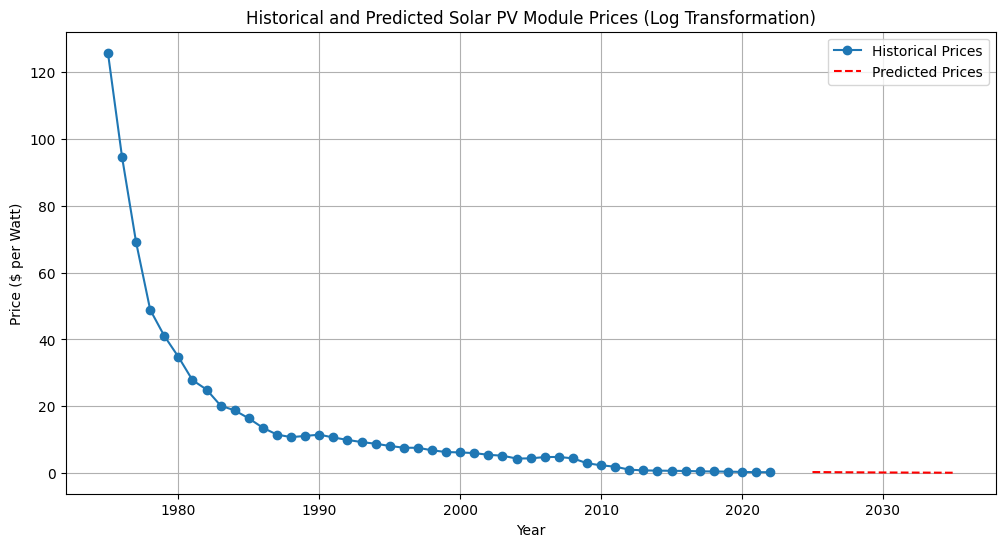

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Apply a logarithmic transformation to the price data
solar_module_prices['Log Price'] = np.log(solar_module_prices['Solar photovoltaic module price']).copy()

# Fit a linear model to the transformed data
model = LinearRegression()
X = solar_module_prices[['Year']].copy()
y = solar_module_prices['Log Price'].copy()
model.fit(X, y)

# Predict future prices using the transformed model
future_years = np.array([[2025], [2030], [2035]])
log_predicted_prices = model.predict(future_years).copy()

# Convert the logarithmic prices back to the original scale
predicted_prices = np.exp(log_predicted_prices).copy()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(solar_module_prices['Year'], solar_module_prices['Solar photovoltaic module price'], label='Historical Prices', marker='o')
plt.plot(future_years, predicted_prices, 'r--', label='Predicted Prices')
plt.title('Historical and Predicted Solar PV Module Prices (Log Transformation)')
plt.xlabel('Year')
plt.ylabel('Price ($ per Watt)')
plt.legend()
plt.grid(True)
plt.show()


Graph 3. **Historical and Predicted Solar PV Module Prices (Log Transformation) Graph:**
 - The log-transformed data presents a more nuanced view, showing a consistent decrease in module prices with predictions of gradual reductions continuing into the next decade, emphasizing ongoing but slowing cost declines.

**Conclusion: Trends in Solar PV Module Pricing**

The historical data clearly illustrates a dramatic decline in solar PV module prices from the 1980s to the present, highlighting the significant cost reductions achieved through technological advancements and economies of scale. The predictive models suggest a continued decrease in prices, though at a potentially slower rate, indicating that the market may be approaching a floor in how low module costs can feasibly go. The log transformation model's prediction supports a steady, manageable decline in prices, reinforcing the economic viability of solar energy for future expansion. These trends are crucial for solar industry stakeholders, suggesting that while solar remains a compelling investment, future cost reductions may yield diminishing returns as prices stabilize.
